**Introduction**

Welcome to the Cyclistic bike-share analysis case study! In this case study, we will perform many real-world tasks of a data analyst. we will work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, we will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act. Along the way, the Case Study Roadmap tables — including guiding questions and key tasks will help you stay on the right path.

**Scenario**

In this case I am data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**Stakeholders**

**Primary**
1. Lily Moreno,director of marketing
2. Cyclistic executive team
**Secondary**
1. Cyclistic marketing analytics team

**Business Task**

Design marketing strategies aimed at converting casual riders into annual members by analyzing four quarters of Cyclistic trips data.

**Data Source**

For the purposes of this case study,the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this <a href="https://www.divvybikes.com/data-license-agreement" target="_blank">this link</a>. This is public data that you can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

**Load Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


**STEP 1: COLLECT DATA**

Upload Divvy datasets (csv files) here

In [2]:
os.getcwd()

'C:\\Users\\AkshayT\\Desktop\\Google\\cyclistic_trip_data_analysis_python'

In [3]:
os.chdir("C:\\Users\\AkshayT\\Desktop\\Google\\cyclistic_trip_data_analysis_python\\cyclistic_trip_data_V01")

In [4]:
q2_2019 = pd.read_csv("Divvy_Trips_2019_Q2.csv")
q3_2019 = pd.read_csv("Divvy_Trips_2019_Q3.csv")
q4_2019 = pd.read_csv("Divvy_Trips_2019_Q4.csv")
q1_2020 = pd.read_csv("Divvy_Trips_2020_Q1.csv")

Let's Check The data

In [5]:
q2_2019.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [6]:
q3_2019.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [7]:
q4_2019.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [8]:
q1_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


**STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE**
* Compare column names each of the files

* While the names don’t have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file

In [9]:
q2_2019.columns

Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')

In [10]:
q3_2019.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [11]:
q4_2019.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [12]:
q1_2020.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

Rename columns to make them consisent with q1_2020 (as this will be the supposed going-forward table design for Divvy)

In [13]:
q2_2019.rename(columns={'01 - Rental Details Rental ID':'ride_id', '01 - Rental Details Bike ID':'rideable_type', 
                         '01 - Rental Details Local Start Time':'started_at',
       '01 - Rental Details Local End Time':'ended_at',
                         '03 - Rental Start Station Name':'start_station_name',
       '03 - Rental Start Station ID':'start_station_id',
                         '02 - Rental End Station Name':'end_station_name',
       '02 - Rental End Station ID':'end_station_id',
       'User Type':'member_casual'},inplace=True)

In [14]:
q3_2019.rename(columns={'trip_id':'ride_id', 'bikeid':'rideable_type', 'start_time':'started_at', 'end_time':'ended_at', 
                    'from_station_name':'start_station_name',
       'from_station_id':'start_station_id', 'to_station_name':'end_station_name', 'to_station_id':'end_station_id',
        'usertype':'member_casual'}, inplace=True)

In [15]:
q4_2019.rename(columns={'trip_id':'ride_id', 'bikeid':'rideable_type', 'start_time':'started_at', 'end_time':'ended_at',
                        'from_station_name':'start_station_name',
       'from_station_id':'start_station_id', 'to_station_name':'end_station_name', 'to_station_id':'end_station_id',
       'usertype':'member_casual'}, inplace=True)

Inspect the dataframes and look for incongruencies

In [16]:
q2_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   ride_id                                           1108163 non-null  int64  
 1   started_at                                        1108163 non-null  object 
 2   ended_at                                          1108163 non-null  object 
 3   rideable_type                                     1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   start_station_id                                  1108163 non-null  int64  
 6   start_station_name                                1108163 non-null  object 
 7   end_station_id                                    1108163 non-null  int64  
 8   end_station_name                                  1108163 non-null  obje

In [17]:
q3_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1640718 non-null  int64  
 1   started_at          1640718 non-null  object 
 2   ended_at            1640718 non-null  object 
 3   rideable_type       1640718 non-null  int64  
 4   tripduration        1640718 non-null  object 
 5   start_station_id    1640718 non-null  int64  
 6   start_station_name  1640718 non-null  object 
 7   end_station_id      1640718 non-null  int64  
 8   end_station_name    1640718 non-null  object 
 9   member_casual       1640718 non-null  object 
 10  gender              1353368 non-null  object 
 11  birthyear           1362624 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 150.2+ MB


In [18]:
q4_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             704054 non-null  int64  
 1   started_at          704054 non-null  object 
 2   ended_at            704054 non-null  object 
 3   rideable_type       704054 non-null  int64  
 4   tripduration        704054 non-null  object 
 5   start_station_id    704054 non-null  int64  
 6   start_station_name  704054 non-null  object 
 7   end_station_id      704054 non-null  int64  
 8   end_station_name    704054 non-null  object 
 9   member_casual       704054 non-null  object 
 10  gender              637463 non-null  object 
 11  birthyear           642373 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 64.5+ MB


In [19]:
q1_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


Change *started_at* and *ended_at* data type in all the dataframes from object to datetime

In [20]:
q2_2019['started_at'] = pd.to_datetime(q2_2019['started_at'], format="%Y-%m-%d %H:%M:%S")
q3_2019['started_at'] = pd.to_datetime(q3_2019['started_at'], format="%Y-%m-%d %H:%M:%S")
q4_2019['started_at'] = pd.to_datetime(q4_2019['started_at'], format="%Y-%m-%d %H:%M:%S")
q1_2020['started_at'] = pd.to_datetime(q1_2020['started_at'], format="%Y-%m-%d %H:%M:%S")
q2_2019['ended_at'] = pd.to_datetime(q2_2019['ended_at'], format="%Y-%m-%d %H:%M:%S")
q3_2019['ended_at'] = pd.to_datetime(q3_2019['ended_at'], format="%Y-%m-%d %H:%M:%S")
q4_2019['ended_at'] = pd.to_datetime(q4_2019['ended_at'], format="%Y-%m-%d %H:%M:%S")
q1_2020['ended_at'] = pd.to_datetime(q1_2020['ended_at'], format="%Y-%m-%d %H:%M:%S")

We observed that data type of *end_station_id* in q2_2019, q3_2019 and q4_2019 is 'int64' but in q1_2020 it is 'float64'
so need to change *end_station_id* in q1_2020 to 'int64'. we need to follow the following steps:

1. Check if there is any null values in column *end_station_id* of q1_2020
2. If yes, then remove those NA values so that we can convert it into 'int64'

In [21]:
q1_2020.drop(q1_2020.loc[q1_2020.end_station_id.isna()].index,inplace=True)

In [22]:
q1_2020['end_station_id'] = q1_2020.end_station_id.astype('int64')
q1_2020['end_station_id'].head()

0    326
1    318
2    117
3     24
4    212
Name: end_station_id, dtype: int64

Convert *ride_id* and *rideable_type* to character for q2_2019, q3_2019 and q4_2019 so that they can stack correctly with q1_2020

In [23]:
q2_2019['ride_id'] = q2_2019['ride_id'].astype('object')
q3_2019['ride_id'] = q3_2019['ride_id'].astype('object')
q4_2019['ride_id'] = q4_2019['ride_id'].astype('object')
q2_2019['rideable_type'] = q2_2019['rideable_type'].astype('object')
q3_2019['rideable_type'] = q3_2019['rideable_type'].astype('object')
q4_2019['rideable_type'] = q4_2019['rideable_type'].astype('object')

Now let's check the data structure

In [24]:
q2_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype         
---  ------                                            --------------    -----         
 0   ride_id                                           1108163 non-null  object        
 1   started_at                                        1108163 non-null  datetime64[ns]
 2   ended_at                                          1108163 non-null  datetime64[ns]
 3   rideable_type                                     1108163 non-null  object        
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object        
 5   start_station_id                                  1108163 non-null  int64         
 6   start_station_name                                1108163 non-null  object        
 7   end_station_id                                    1108163 non-null  int64         
 8   en

In [25]:
q3_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1640718 non-null  object        
 1   started_at          1640718 non-null  datetime64[ns]
 2   ended_at            1640718 non-null  datetime64[ns]
 3   rideable_type       1640718 non-null  object        
 4   tripduration        1640718 non-null  object        
 5   start_station_id    1640718 non-null  int64         
 6   start_station_name  1640718 non-null  object        
 7   end_station_id      1640718 non-null  int64         
 8   end_station_name    1640718 non-null  object        
 9   member_casual       1640718 non-null  object        
 10  gender              1353368 non-null  object        
 11  birthyear           1362624 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 15

In [26]:
q4_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             704054 non-null  object        
 1   started_at          704054 non-null  datetime64[ns]
 2   ended_at            704054 non-null  datetime64[ns]
 3   rideable_type       704054 non-null  object        
 4   tripduration        704054 non-null  object        
 5   start_station_id    704054 non-null  int64         
 6   start_station_name  704054 non-null  object        
 7   end_station_id      704054 non-null  int64         
 8   end_station_name    704054 non-null  object        
 9   member_casual       704054 non-null  object        
 10  gender              637463 non-null  object        
 11  birthyear           642373 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 64.5+ MB


In [27]:
q1_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426886 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             426886 non-null  object        
 1   rideable_type       426886 non-null  object        
 2   started_at          426886 non-null  datetime64[ns]
 3   ended_at            426886 non-null  datetime64[ns]
 4   start_station_name  426886 non-null  object        
 5   start_station_id    426886 non-null  int64         
 6   end_station_name    426886 non-null  object        
 7   end_station_id      426886 non-null  int64         
 8   start_lat           426886 non-null  float64       
 9   start_lng           426886 non-null  float64       
 10  end_lat             426886 non-null  float64       
 11  end_lng             426886 non-null  float64       
 12  member_casual       426886 non-null  object        
dtypes: datetime64[ns](2), float64

Combine each quarter’s data frames into one single data frame

In [28]:
all_trips = pd.concat([q2_2019,q3_2019,q4_2019,q1_2020], ignore_index=True)
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year,tripduration,gender,birthyear,start_lat,start_lng,end_lat,end_lng
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We should remove all the columns from combined dataset 'all_trips' which are not present in the 'q1_2020' dataset

In [29]:
all_trips = all_trips.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng', 'birthyear', 'gender', "01 - Rental Details Duration In Seconds Uncapped", "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"])
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber


**STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS**

Inspect the new table that has been created

In [30]:
all_trips.columns

Index(['ride_id', 'started_at', 'ended_at', 'rideable_type',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_casual'],
      dtype='object')

In [31]:
all_trips.shape

(3879821, 9)

In [32]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879821 entries, 0 to 3879820
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   rideable_type       object        
 4   start_station_id    int64         
 5   start_station_name  object        
 6   end_station_id      int64         
 7   end_station_name    object        
 8   member_casual       object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 266.4+ MB


In [33]:
all_trips.describe()

,start_station_id,end_station_id
count,3.879821e+06,3.879821e+06
mean,2.028971e+02,2.037552e+02
std,1.571359e+02,1.571912e+02
min,1.000000e+00,1.000000e+00
25%,7.700000e+01,7.700000e+01
50%,1.740000e+02,1.740000e+02
75%,2.910000e+02,2.910000e+02
max,6.750000e+02,6.750000e+02


There are a few problems we will need to fix:
(1) In the “member_casual” column, there are two names for members (“member” and “Subscriber”) and two names for casual riders (“Customer” and “casual”). We will need to consolidate that from four to two labels.

In the “member_casual” column, replace “Subscriber” with “member” and “Customer” with “casual”

Before 2020, Divvy used different labels for these two types of riders … we will want to make our dataframe consistent with their current nomenclature Begin by seeing how many observations fall under each usertype

In [34]:
all_trips.member_casual.value_counts()

Subscriber    2595461
Customer       857474
member         378407
casual          48479
Name: member_casual, dtype: int64

In [35]:
all_trips.member_casual.replace({"Subscriber":"member","Customer":"casual"},inplace=True)

In [36]:
all_trips.member_casual.value_counts()

member    2973868
casual     905953
Name: member_casual, dtype: int64

(2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data – such as day, month, year – that provide additional opportunities to aggregate the data.

Add columns that list the date, month, day, and year of each ride

This will allow us to aggregate ride data for each month, day, or year … before completing these operations we could only aggregate at the ride level

In [37]:
all_trips['date'] = pd.to_datetime(all_trips.started_at).dt.date
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01


In [38]:
all_trips['day'] = pd.to_datetime(all_trips.date).dt.day
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,1
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,1
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,1
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,1
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,1


In [39]:
all_trips['month'] = pd.to_datetime(all_trips.date).dt.month
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,1,4
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,1,4
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,1,4
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,1,4
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,1,4


In [40]:
all_trips['year'] = pd.to_datetime(all_trips.date).dt.year
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month,year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,1,4,2019
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,1,4,2019
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,1,4,2019
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,1,4,2019
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,1,4,2019


In [41]:
all_trips['day_of_week'] = pd.to_datetime(all_trips['date']).dt.day_name()
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month,year,day_of_week
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,1,4,2019,Monday
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,1,4,2019,Monday
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,1,4,2019,Monday
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,1,4,2019,Monday
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,1,4,2019,Monday


Add a “ride_length” calculation to all_trips (in seconds)

In [42]:
import datetime as dt

all_trips['ride_length'] = (pd.to_datetime(all_trips.ended_at) - pd.to_datetime(all_trips.started_at)).dt.total_seconds()
all_trips.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month,year,day_of_week,ride_length
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,2019-04-01,1,4,2019,Monday,446.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,2019-04-01,1,4,2019,Monday,1048.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,2019-04-01,1,4,2019,Monday,252.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,2019-04-01,1,4,2019,Monday,357.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,2019-04-01,1,4,2019,Monday,1007.0


In [43]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879821 entries, 0 to 3879820
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   rideable_type       object        
 4   start_station_id    int64         
 5   start_station_name  object        
 6   end_station_id      int64         
 7   end_station_name    object        
 8   member_casual       object        
 9   date                object        
 10  day                 int64         
 11  month               int64         
 12  year                int64         
 13  day_of_week         object        
 14  ride_length         float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(7)
memory usage: 444.0+ MB


Let's convert “ride_length” to int64 so we can run calculations on the data

In [44]:
all_trips['ride_length'] = all_trips.ride_length.astype('int64')
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879821 entries, 0 to 3879820
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   rideable_type       object        
 4   start_station_id    int64         
 5   start_station_name  object        
 6   end_station_id      int64         
 7   end_station_name    object        
 8   member_casual       object        
 9   date                object        
 10  day                 int64         
 11  month               int64         
 12  year                int64         
 13  day_of_week         object        
 14  ride_length         int64         
dtypes: datetime64[ns](2), int64(6), object(7)
memory usage: 444.0+ MB


**Remove “bad” data**
The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative

We will create a new version of the dataframe (v2) since data is being removed

In [45]:
all_trips_v2 = all_trips.loc[~((all_trips.start_station_name == "HQ QR") | (all_trips.ride_length < 0)),]

**STEP 4: CONDUCT DESCRIPTIVE ANALYSIS**

Descriptive analysis on ride_length (all figures in seconds)

In [46]:
all_trips_v2.ride_length.mean()

1479.1390279052703

In [47]:
all_trips_v2.ride_length.median()

712.0

In [48]:
all_trips_v2.ride_length.max()

9387024

In [49]:
all_trips_v2.ride_length.min()

1

You can condense the four lines above to one line using describe() on the specific attribute

In [50]:
all_trips_v2.ride_length.describe()

count    3.876042e+06
mean     1.479139e+03
std      3.092397e+04
min      1.000000e+00
25%      4.120000e+02
50%      7.120000e+02
75%      1.289000e+03
max      9.387024e+06
Name: ride_length, dtype: float64

Compare members and casual users

In [51]:
all_trips_v2.groupby('member_casual')['ride_length'].mean()

member_casual
casual    3552.750173
member     850.066156
Name: ride_length, dtype: float64

In [52]:
all_trips_v2.groupby('member_casual')['ride_length'].median()

member_casual
casual    1546.0
member     589.0
Name: ride_length, dtype: float64

In [53]:
all_trips_v2.groupby('member_casual')['ride_length'].max()

member_casual
casual    9387024
member    9056634
Name: ride_length, dtype: int64

In [54]:
all_trips_v2.groupby('member_casual')['ride_length'].min()

member_casual
casual    2
member    1
Name: ride_length, dtype: int64

In [55]:
all_trips_v2.groupby(['member_casual', 'day_of_week'])['ride_length'].mean()

member_casual  day_of_week
casual         Friday         3773.835112
               Monday         3372.286923
               Saturday       3331.913841
               Sunday         3581.405388
               Thursday       3682.984671
               Tuesday        3596.359949
               Wednesday      3718.661897
member         Friday          824.530506
               Monday          842.572569
               Saturday        968.933723
               Sunday          919.974616
               Thursday        823.927803
               Tuesday         826.142747
               Wednesday       823.999644
Name: ride_length, dtype: float64

Notice that the days of the week are out of order. Let’s fix that.

In [62]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [63]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
all_trips_v2['day_of_week'] = all_trips_v2['day_of_week'].astype(cat_type)

C:\Users\AkshayT\AppData\Local\Temp/ipykernel_4500/494556422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_trips_v2['day_of_week'] = all_trips_v2['day_of_week'].astype(cat_type)


In [64]:
all_trips_v2.groupby(['member_casual', 'day_of_week'])['ride_length'].mean()

member_casual  day_of_week
casual         Sunday         3581.405388
               Monday         3372.286923
               Tuesday        3596.359949
               Wednesday      3718.661897
               Thursday       3682.984671
               Friday         3773.835112
               Saturday       3331.913841
member         Sunday          919.974616
               Monday          842.572569
               Tuesday         826.142747
               Wednesday       823.999644
               Thursday        823.927803
               Friday          824.530506
               Saturday        968.933723
Name: ride_length, dtype: float64

In [65]:
all_trips_v2.groupby(['day_of_week','member_casual'])['ride_length'].mean()

day_of_week  member_casual
Sunday       casual           3581.405388
             member            919.974616
Monday       casual           3372.286923
             member            842.572569
Tuesday      casual           3596.359949
             member            826.142747
Wednesday    casual           3718.661897
             member            823.999644
Thursday     casual           3682.984671
             member            823.927803
Friday       casual           3773.835112
             member            824.530506
Saturday     casual           3331.913841
             member            968.933723
Name: ride_length, dtype: float64

Analyze ridership data by type and weekday

In [69]:
all_trips_v2.groupby(['member_casual', 'day_of_week'])['ride_length'].agg(['count', 'mean'])

count         mean
member_casual day_of_week                     
casual        Sunday       181293  3581.405388
              Monday       103296  3372.286923
              Tuesday       90510  3596.359949
              Wednesday     92457  3718.661897
              Thursday     102679  3682.984671
              Friday       122404  3773.835112
              Saturday     209543  3331.913841
member        Sunday       267965   919.974616
              Monday       472196   842.572569
              Tuesday      508445   826.142747
              Wednesday    500329   823.999644
              Thursday     484177   823.927803
              Friday       452790   824.530506
              Saturday     287958   968.933723

In [82]:
trips_summary = all_trips_v2.groupby(['member_casual', 'day_of_week'])['ride_length'].agg(['count', 'mean']).reset_index()
trips_summary.head()

,member_casual,day_of_week,count,mean
0,casual,Sunday,181293,3581.405388
1,casual,Monday,103296,3372.286923
2,casual,Tuesday,90510,3596.359949
3,casual,Wednesday,92457,3718.661897
4,casual,Thursday,102679,3682.984671


**STEP 5: VISUALIZATION**

Let’s visualize the number of rides by rider type on each day of week

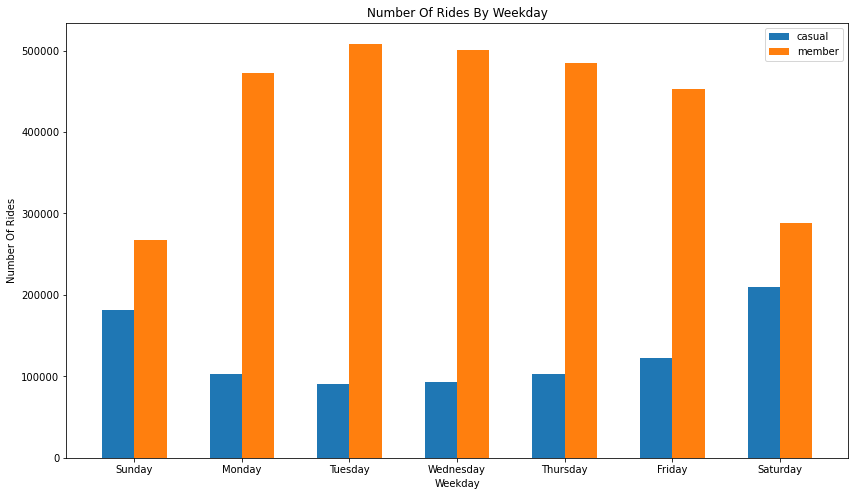

In [118]:
plt.figure(figsize=(14,8))

w=0.3      # defining width of the bar
x = trips_summary.day_of_week.unique()      # defining x axis
bar1 = np.arange(len(x))     # defining position of bar 1
bar2 = [i + w for i in bar1]      # defining position of bar 2
plt.bar(bar1, trips_summary.loc[(trips_summary.member_casual == 'casual'),]['count'], w, label='casual')
plt.bar(bar2, trips_summary.loc[(trips_summary.member_casual == 'member'),]['count'],w, label='member')
plt.xlabel('Weekday')
plt.ylabel('Number Of Rides')
plt.title('Number Of Rides By Weekday')
plt.xticks(bar1+w/2,x)
plt.legend()
plt.savefig('Plot1.png',format='png')       # saving the plot
plt.show()

Let’s create a visualization for average duration

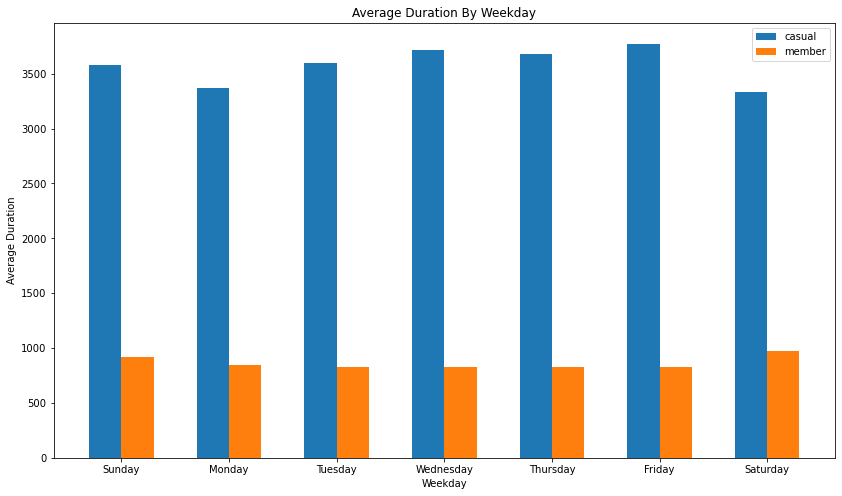

In [120]:
plt.figure(figsize=(14,8))

w=0.3      # defining width of the bar
x = trips_summary.day_of_week.unique()      # defining x axis
bar1 = np.arange(len(x))     # defining position of bar 1
bar2 = [i + w for i in bar1]      # defining position of bar 2
plt.bar(bar1, trips_summary.loc[(trips_summary.member_casual == 'casual'),]['mean'], w, label='casual')
plt.bar(bar2, trips_summary.loc[(trips_summary.member_casual == 'member'),]['mean'],w, label='member')
plt.xlabel('Weekday')
plt.ylabel('Average Duration')
plt.title('Average Duration By Weekday')
plt.xticks(bar1+w/2,x)
plt.legend()
plt.savefig('Plot2.png',format='png')       # saving the plot
plt.show()

**STEP 6: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS**

Create a csv file that we will visualize in Excel, Tableau, or my presentation software

In [123]:
trips_summary.to_csv(r'trips_summary.csv', index=False, header=True)

**Findings**

**How do annual members and casual riders use Cyclistic bikes differently**

a. Annual members contribute large number of rides during and at the end of the week. But number of rides drops significantly on Saturdays and Sundays. As we can see in plot 1.

b. Annual members average ride length is very less as compare to casual riders as we can see in plot 2.

c. On the other hands Casual members travel for larger duration than annual members.

d. Number of rides of casual riders is significantly less than members.

e. Most probably casual riders travel larger distance than members.

f. Casual riders took large number of rides for long duration on Saturdays and Sundays which is unique as compare to members.

**Inference**

**Why would casual riders buy Cyclistic annual memberships**

a. Casual riders travel for larger duration than members.

b. Casual riders took large number of rides for long duration on Saturdays and Sundays which is unique as compare to members.

c. Cyclistic could provide tailored annual membership for such riders which will save their extra spending.

**Recommendations**

**How can Cyclistic use digital media to influence casual riders to become members**

a. Casual rider rides for larger duration, that means they usually travel larger distance as compare to members, so Cyclistic could provide such casual riders a specific plan for such large distance rides like discounts on every incremental mile.

b. Cyclistic could share these interesting findings with the casual riders and promote this specific membership plans by sending emails after completion of a ride.

c. Cyclistic could promote these membership plans by putting ads on local radio, because we are assuming as casual riders are riding for large duration, they might be listening local radios for entertainment.

d. Cyclistic could use social media sites like Facebook, Twitter, Spotify and Instagram to reach out to potential casual riders and promote the ads regarding the plans.

e. Cyclistic could also conduct the feedback on its riding application about how does the riders feel about the new specific plans.

f. Cyclistic could also provide weekend discounts to members so that casual riders could get attracted towards these plans as they took maximum number of rides on Saturdays and Sundays and also traveled for large duration.